# Imports

In [64]:
!pip install opencv-python-headless
!pip install matplotlib
!pip install scikit-learn

In [89]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from IPython.display import clear_output
import time

# GPU Check

In [66]:
# List CUDA devices
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Check if TensorFlow is built with CUDA
print("Built with CUDA: ", tf.test.is_built_with_cuda())

# Check if GPU device is available and TensorFlow can access it
print("GPU Available: ", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

Num GPUs Available:  1
Built with CUDA:  True
GPU Available:  True


# Data Load 

In [67]:
frames_inside = 'C:\\Users\\William\\Documents\\stewards\\extracted_frames\\inside'
frames_outside = 'C:\\Users\\William\\Documents\\stewards\\extracted_frames\\outside'
inside = os.listdir(frames_inside)
outside = os.listdir(frames_outside)
print(len(inside))
print(len(outside))

2877
66


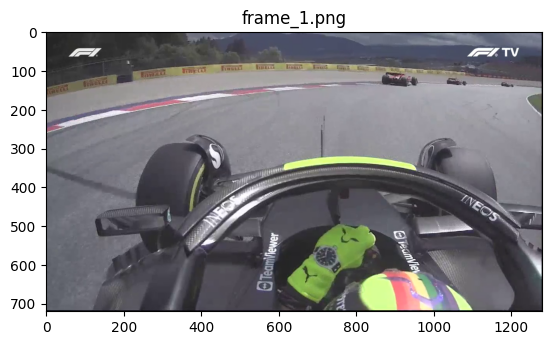

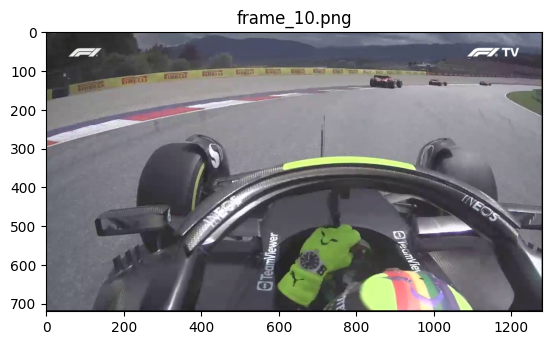

In [68]:
# Load and display the first few frames
for frame_file in frame_files[:3]:
    frame_path = os.path.join(frames_inside, frame_file)
    frame = cv2.imread(frame_path)
    
    # Convert from BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    plt.imshow(frame)
    plt.title(frame_file)
    plt.axis('on')
    plt.show()

In [69]:
# Initialize lists to store data and labels
data = []
labels = []

# Load 'inside' frames and append to data and labels lists
for frame_file in os.listdir(frames_inside):
    frame_path = os.path.join(frames_inside, frame_file)
    frame = cv2.imread(frame_path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    data.append(frame)
    labels.append(1)  # Label '1' for inside

# Similarly, load 'outside' frames
for frame_file in os.listdir(frames_outside):
    frame_path = os.path.join(frames_outside, frame_file)
    frame = cv2.imread(frame_path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    data.append(frame)
    labels.append(0)  # Label '0' for outside

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Preprocessing

In [70]:
width = 128
height = 128

frames_resized = np.array([cv2.resize(frame, (width, height)) for frame in data])
# Normalize pixel values
frames_normalized = frames_resized / 255.0


In [71]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(frames_normalized, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model

In [72]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
65/65 [==============================] - 2s 26ms/step - loss: 0.1098 - accuracy: 0.9612 - val_loss: 0.0172 - val_accuracy: 0.9819
Epoch 2/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0228 - accuracy: 0.9806 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 3/10
65/65 [==============================] - 1s 19ms/step - loss: 0.0224 - accuracy: 0.9917 - val_loss: 0.0145 - val_accuracy: 0.9955
Epoch 4/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0196 - accuracy: 0.9917 - val_loss: 0.0146 - val_accuracy: 0.9955
Epoch 5/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0192 - accuracy: 0.9922 - val_loss: 0.0149 - val_accuracy: 0.9955
Epoch 6/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0204 - accuracy: 0.9961 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 7/10
65/65 [==============================] - 1s 18ms/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.0144 - val_accuracy: 0.9955
Epoch 8/10
65

In [75]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

14/14 [==============================] - 0s 12ms/step - loss: 0.0196 - accuracy: 0.9955
Test Accuracy: 0.9954751133918762


14/14 [==============================] - 0s 20ms/step


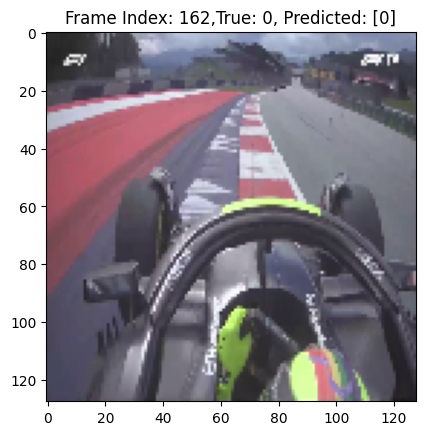

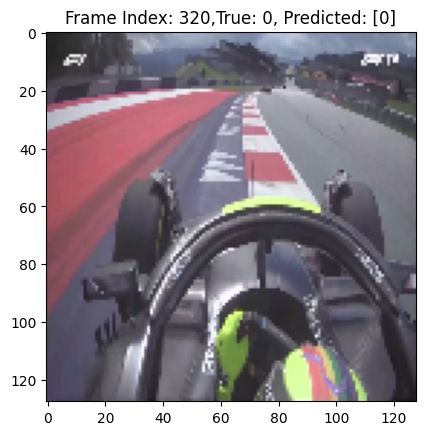

In [142]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # For binary classification

indices = np.random.choice(range(len(X_test)), size=100, replace=False)

for idx in indices:
    if y_pred_classes[idx] == 0:  # Only display if predicted as 0
        plt.imshow(X_test[idx])
        plt.title(f"Frame Index: {idx},True: {y_test[idx]}, Predicted: {y_pred_classes[idx]}")
        plt.show()

# Loading in Live Video

In [119]:
def preprocess_frame(frame, target_size=(width, height)):
    # Resize the frame to the target size
    frame_resized = cv2.resize(frame, target_size)
    
    # Normalize pixel values to [0, 1]
    frame_normalized = frame_resized / 255.0
    
    return frame_normalized

In [130]:
video_path = 'C:\\Users\\William\\Documents\\stewards\\data\\ham1.mp4'
cap = cv2.VideoCapture(video_path)

12


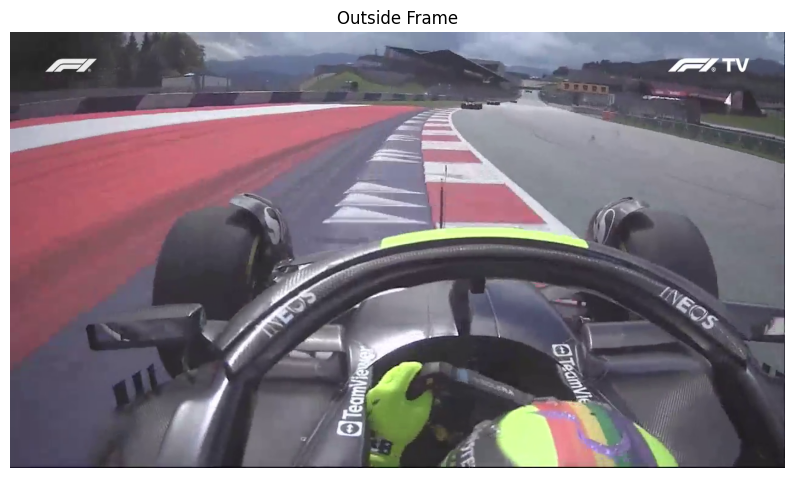

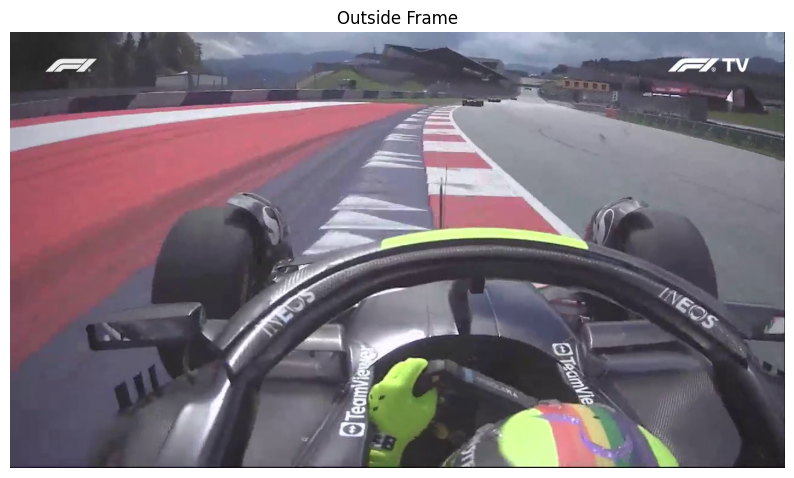

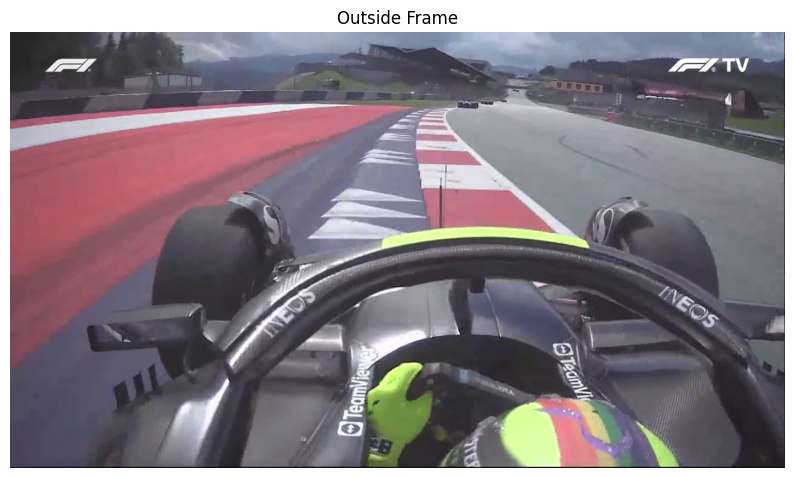

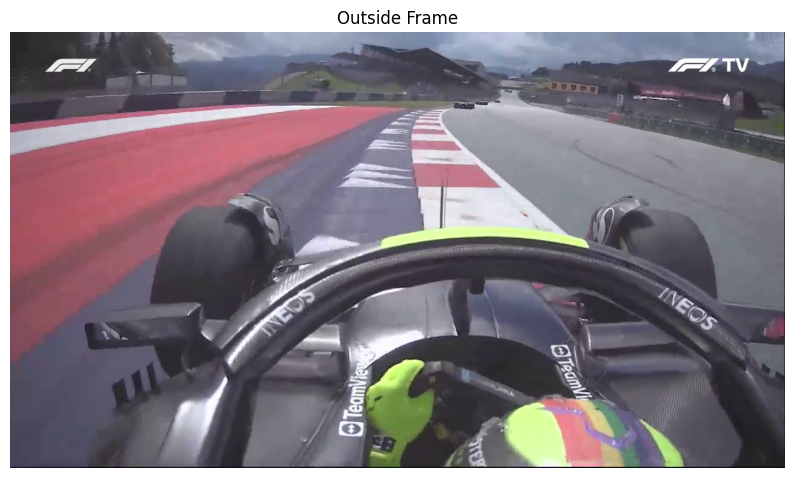

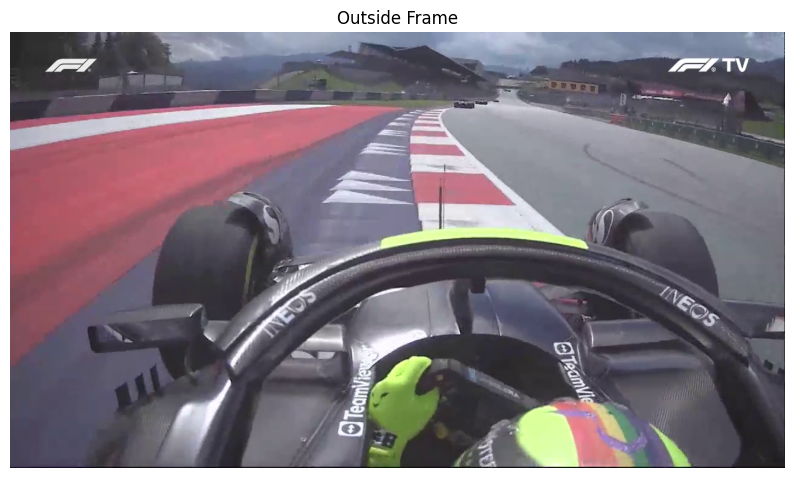

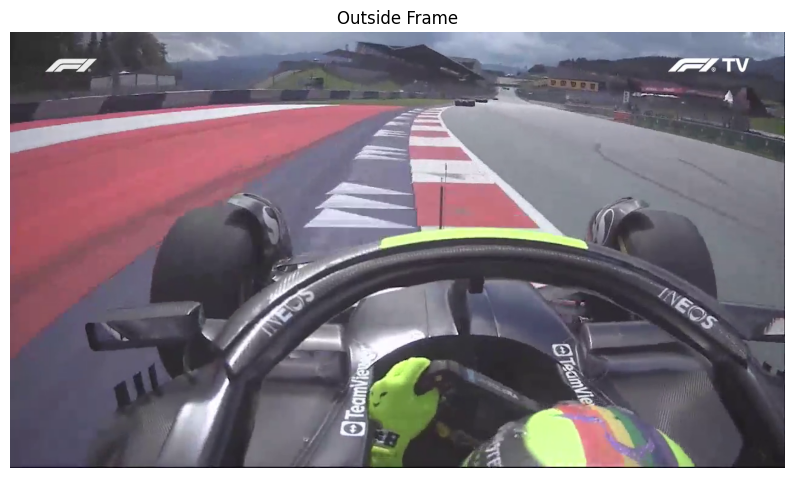

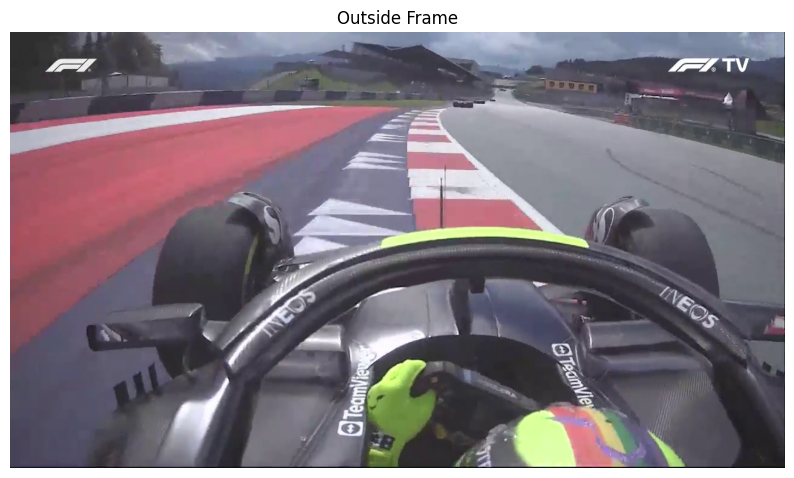

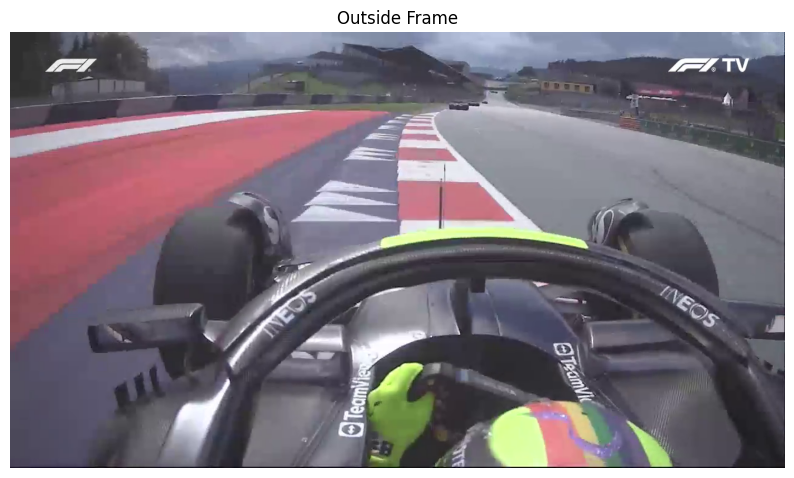

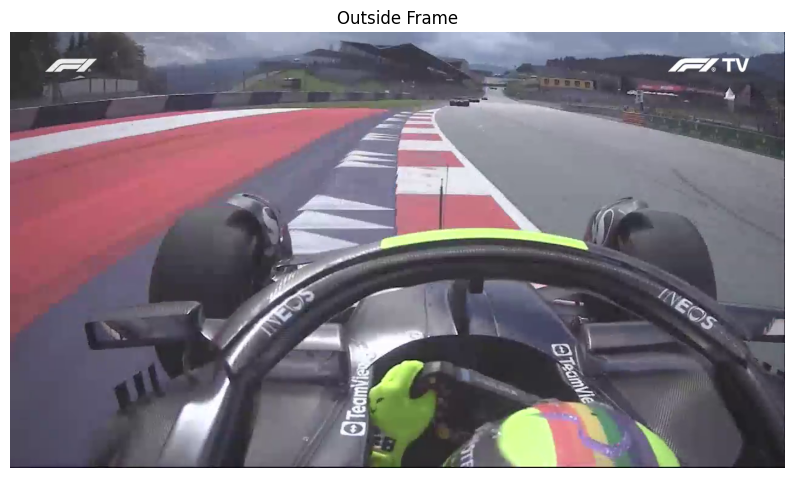

In [131]:
frame_limit = 5000  # You can set this to the number of frames you want to process
frame_count = 0
outside_count = 0

while cap.isOpened() and frame_count < frame_limit:
    ret, frame = cap.read()
    if not ret:
        break

    preprocessed_frame = preprocess_frame(frame)
    
    # Add batch dimension
    input_frame = np.expand_dims(preprocessed_frame, axis=0)
    
    # Make a prediction
    prediction = model.predict(input_frame,verbose = 0)
    label = (prediction > 0.5).astype(int)[0]
    
    # Check if the prediction is "outside"
    if label == 0:  # Assuming 1 represents "outside"
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Outside Frame')
        plt.axis('off')
        display(plt.gcf())
        time.sleep(0.1)
        clear_output(wait=True)
        outside_count +=1
        
        
    frame_count += 1
print(outside_count)

In [132]:
cap.release()
